# Embedding a 2D Circle with t-SNE
following the paper "Initialization is critical for preserving global data
structure in both t-SNE and UMAP" by Kobak and Lindermann

In [1]:
%matplotlib inline 

import numpy as np
import pylab as plt
import seaborn as sns
sns.set_theme(context='paper', style='ticks', font='Arial')

from openTSNE import TSNE

import openTSNE
print('openTSNE', openTSNE.__version__)

openTSNE 1.0.2


In [2]:
# Generate the data

n = 7000
np.random.seed(42)
X = np.random.randn(n,3) / 1000
X[:,0] += np.cos(np.arange(n)*2*np.pi/n)
X[:,1] += np.sin(np.arange(n)*2*np.pi/n)

In [3]:
%%time

# BH is faster for this sample size
Z1 = TSNE(n_jobs=-1, n_iter=1000, initialization='random', random_state=42, negative_gradient_method='bh', verbose=True).fit(X)
Z2 = TSNE(n_jobs=-1,n_iter=1000, negative_gradient_method='bh', verbose=True).fit(X)

CPU times: user 8min 57s, sys: 9.04 s, total: 9min 6s
Wall time: 9min 47s


In [ ]:
## also try initialisation with spectral clustering method!! 

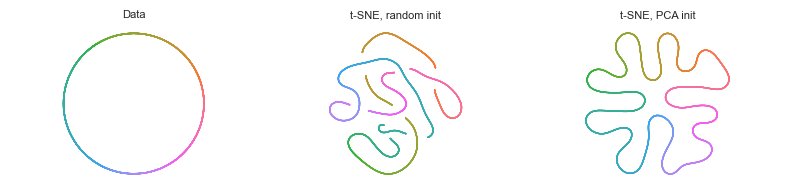

In [5]:

from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(n))

titles = ['Data', 't-SNE, random init', 't-SNE, PCA init']

plt.figure(figsize=(8,2))

for i,Z in enumerate([X,Z1,Z2],1):
    plt.subplot(1,3,i)
    plt.gca().set_aspect('equal', adjustable='datalim')
    plt.scatter(Z[:,0], Z[:,1], s=1, c=np.arange(n), cmap=cmap, 
                edgecolor='none', rasterized=True)
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i-1], fontsize=8)
    
sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()
# plt.savefig('tsne-circle.png', dpi=300)
# plt.savefig('tsne-umap-circle.pdf', dpi=300)

## trying the same on an equilateral triangle

In [7]:
# Define equilateral triangle vertices
v1 = np.array([0, 0])
v2 = np.array([1, 0])
v3 = np.array([0.5, np.sqrt(3) / 2])

# Parametric representation of the triangle perimeter
t = np.linspace(0, 1, n, endpoint=False)  # Parameter along the perimeter

# Determine which edge each point belongs to
edge = (t * 3).astype(int)  # 3 edges

# Interpolate along edges
X_trig = np.zeros((n, 2))
X_trig[edge == 0] = np.outer(t[edge == 0] * 3, v2 - v1) + v1  # Bottom edge
X_trig[edge == 1] = np.outer((t[edge == 1] - 1/3) * 3, v3 - v2) + v2  # Right edge
X_trig[edge == 2] = np.outer((t[edge == 2] - 2/3) * 3, v1 - v3) + v3  # Left edge

# Add small Gaussian noise
X_trig += np.random.randn(n, 2) / 1000

In [11]:

# BH is faster for this sample size
Z1_trig = TSNE(n_jobs=-1, initialization='random', random_state=42, negative_gradient_method='bh', verbose=True).fit(X_trig)
Z2_trig = TSNE(n_jobs=-1, random_state=42, negative_gradient_method='bh', verbose=True).fit(X_trig)
Z3_trig = TSNE(n_jobs=-1, random_state=12, negative_gradient_method='bh', verbose=True).fit(X_trig)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, initialization='random', n_jobs=-1,
     negative_gradient_method='bh', random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 4.75 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.52 seconds
===> Running optimization with exaggeration=12.00, lr=583.33 for 250 iterations...
Iteration   50, KL divergence 3.4867, 50 iterations in 13.8198 sec
Iteration  100, KL divergence 2.7657, 50 iterations in 9.2859 sec
Iteration  150, KL divergence 2.3541, 50 iterations in 9.4069 sec
Iteration  200, KL divergence 2.1641, 50 iterations in 9.4297 sec
Iteration  250, KL divergence 2.0399, 50 iterations in 8.7993 sec
   --> Time elapsed: 50.74 seconds
===> Running optimization with exaggeration=1.00, lr=7000.00 

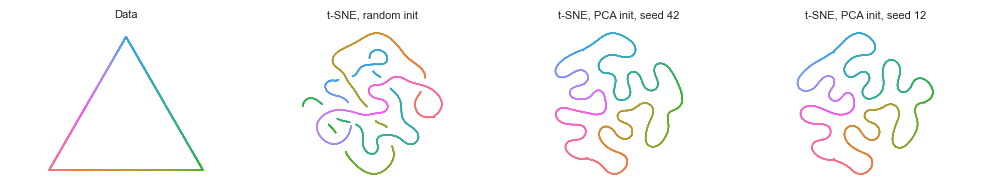

In [13]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(n))

titles = ['Data', 't-SNE, random init', 't-SNE, PCA init, seed 42', 't-SNE, PCA init, seed 12']

plt.figure(figsize=(10,2))

for i,Z in enumerate([X_trig, Z1_trig, Z2_trig, Z3_trig],1):
    plt.subplot(1,4,i)
    plt.gca().set_aspect('equal', adjustable='datalim')
    plt.scatter(Z[:,0], Z[:,1], s=1, c=np.arange(n), cmap=cmap, 
                edgecolor='none', rasterized=True)
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i-1], fontsize=8)
    
sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()

## t-SNE on a square

In [14]:
# Define square vertices
v1 = np.array([0, 0])   # Bottom-left
v2 = np.array([1, 0])   # Bottom-right
v3 = np.array([1, 1])   # Top-right
v4 = np.array([0, 1])   # Top-left

# Parametric representation of the square perimeter
t = np.linspace(0, 1, n, endpoint=False)  # Parameter along the perimeter

# Determine which edge each point belongs to
edge = (t * 4).astype(int)  # 4 edges

# Interpolate along edges
X_square = np.zeros((n, 2))
X_square[edge == 0] = np.outer(t[edge == 0] * 4, v2 - v1) + v1  # Bottom edge
X_square[edge == 1] = np.outer((t[edge == 1] - 1/4) * 4, v3 - v2) + v2  # Right edge
X_square[edge == 2] = np.outer((t[edge == 2] - 2/4) * 4, v4 - v3) + v3  # Top edge
X_square[edge == 3] = np.outer((t[edge == 3] - 3/4) * 4, v1 - v4) + v4  # Left edge

# Add small Gaussian noise
X_square += np.random.randn(n, 2) / 1000


In [15]:
# BH is faster for this sample size
Z0_square = TSNE(n_jobs=-1, initialization='random', random_state=12, negative_gradient_method='bh').fit(X_square)
Z1_square = TSNE(n_jobs=-1, initialization='random', random_state=42, negative_gradient_method='bh').fit(X_square)
Z2_square = TSNE(n_jobs=-1, random_state=42, negative_gradient_method='bh').fit(X_square)
Z3_square = TSNE(n_jobs=-1, random_state=12, negative_gradient_method='bh').fit(X_square)

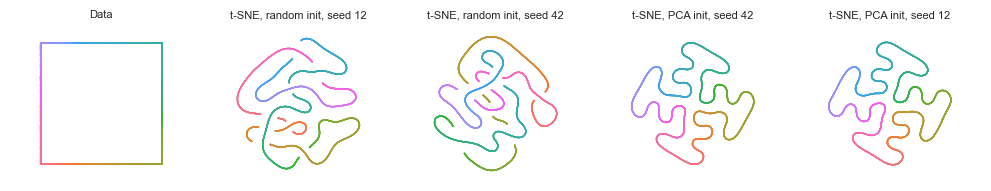

In [17]:
titles = ['Data', 't-SNE, random init, seed 12', 't-SNE, random init, seed 42', 't-SNE, PCA init, seed 42', 't-SNE, PCA init, seed 12']

plt.figure(figsize=(10,2))

for i,Z in enumerate([X_square, Z0_square, Z1_square, Z2_square, Z3_square],1):
    plt.subplot(1,5,i)
    plt.gca().set_aspect('equal', adjustable='datalim')
    plt.scatter(Z[:,0], Z[:,1], s=1, c=np.arange(n), cmap=cmap, 
                edgecolor='none', rasterized=True)
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i-1], fontsize=8)
    
sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()